# Plot signatures for chips (12 classses)

This notebook generates some static plots of spatial signatures. We have a series of custom MapBox basemaps that need an API token. You will need to create and pass your own token to reproduce the figures.

## Spatial Signatures

In [6]:
import geopandas as gpd
from shapely.geometry import Point
import urbangrammar_graphics as ugg
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
import contextily

In [7]:
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})

In [8]:
spsig = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_levels_simplified.pq")

In [9]:
spsig.signature_type.unique()

array(['0_0', '1_0', '3_0', '4_0', '5_0', '6_0', '7_0', '8_0', '2_0',
       '2_1', '2_2', '9_0', '9_1', '9_2', '9_3', '9_4', '9_5', '9_6',
       '9_7', '9_8'], dtype=object)

In [10]:
cmap = ugg.get_colormap(spsig.signature_type.nunique(), randomize=False)

In [53]:
spsig.signature_type.nunique()

20

In [11]:
cols = cmap.colors

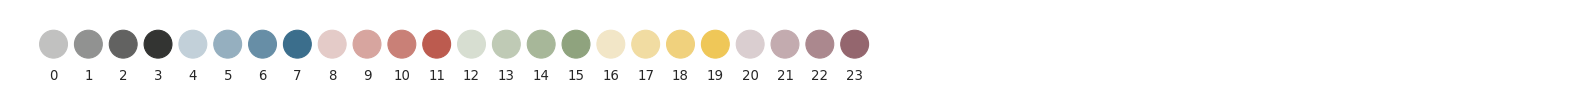

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))
    plt.text(i, -1, i, horizontalalignment='center')
    ax.set_axis_off()
    ax.set_aspect(1)
    ax.autoscale()
    plt.xlim(-1.25,43.25)
    plt.ylim(-1,1)

In [13]:
symbology = {'0_0': cols[16],
             '1_0': cols[15],
             '3_0': cols[9],
             '4_0': cols[12],
             '5_0': cols[21],
             '6_0': cols[8],
             '7_0': cols[4],
             '8_0': cols[18],
             '2_0': cols[6],
             '2_1': cols[23],
             '2_2': cols[19],
             '9_0': cols[7],
             '9_1': cols[7],
             '9_2': cols[7],
             '9_3': cols[0], # outlier
             '9_4': cols[7],
             '9_5': cols[7],
             '9_6': cols[0], # outlier
             '9_7': cols[0], # outlier
             '9_8': cols[0], # outlier
            }

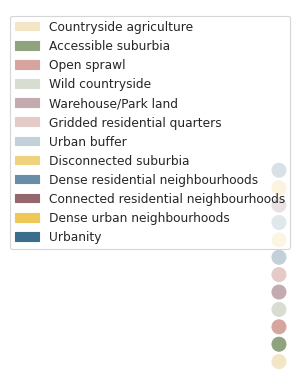

In [46]:
types = {
    "0_0": "Countryside agriculture",
    "1_0": "Accessible suburbia",
    "3_0": "Open sprawl",
    "4_0": "Wild countryside",
    "5_0": "Warehouse/Park land",
    "6_0": "Gridded residential quarters",
    "7_0": "Urban buffer",
    "8_0": "Disconnected suburbia",
    "2_0": "Dense residential neighbourhoods",
    "2_1": "Connected residential neighbourhoods",
    "2_2": "Dense urban neighbourhoods",
    "9_0": "Urbanity",
}


fig, ax = plt.subplots()
for i, c in enumerate(types.keys()):
    ax.add_artist(plt.Circle((0, i), 0.4, color=symbology[c], label=types[c]))
    # plt.text(1, i, types[c], verticalalignment="center")
    ax.set_axis_off()
    ax.set_aspect(1)
    ax.autoscale()
    plt.xlim(-1.25,1)
    plt.ylim(-1,20.25)
ax.legend()

In [14]:
token = "pk.eyJ1IjoibWFydGluZmxlaXMiLCJhIjoiY2t3Zzlkb3p4MGtrYzJvbnZqOGpjZjZtNSJ9.ANK4NEb_I45ucD_BHZt-Mg"

In [15]:
spsig = spsig.to_crs(3857)

In [16]:
df = spsig

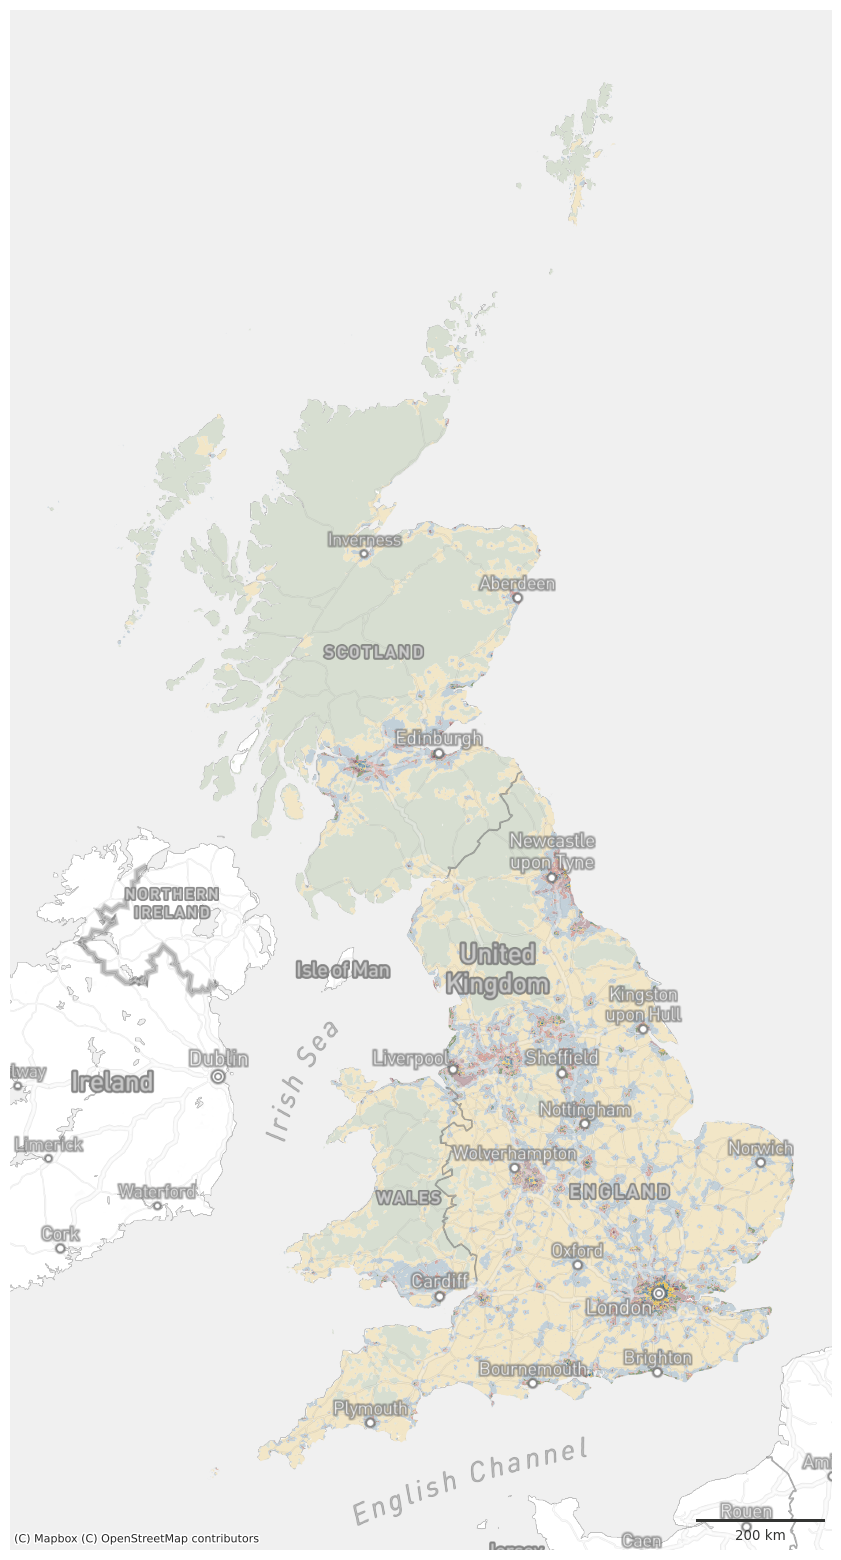

In [49]:
ax = df.plot(color=df['signature_type'].map(symbology), figsize=(20, 20), zorder=1, linewidth=0, edgecolor='w', alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

# ugg.north_arrow(plt.gcf(), ax, 0, size=.05, linewidth=1, color=ugg.COLORS[0], loc="upper left", pad=.002, alpha=.9)

# custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in symbology.values()]
# leg_points = ax.legend(custom_points, symbology.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
# ax.add_artist(leg_points)

plt.savefig("figs/signatures_gb_12_classes.png", dpi=300, bbox_inches="tight")

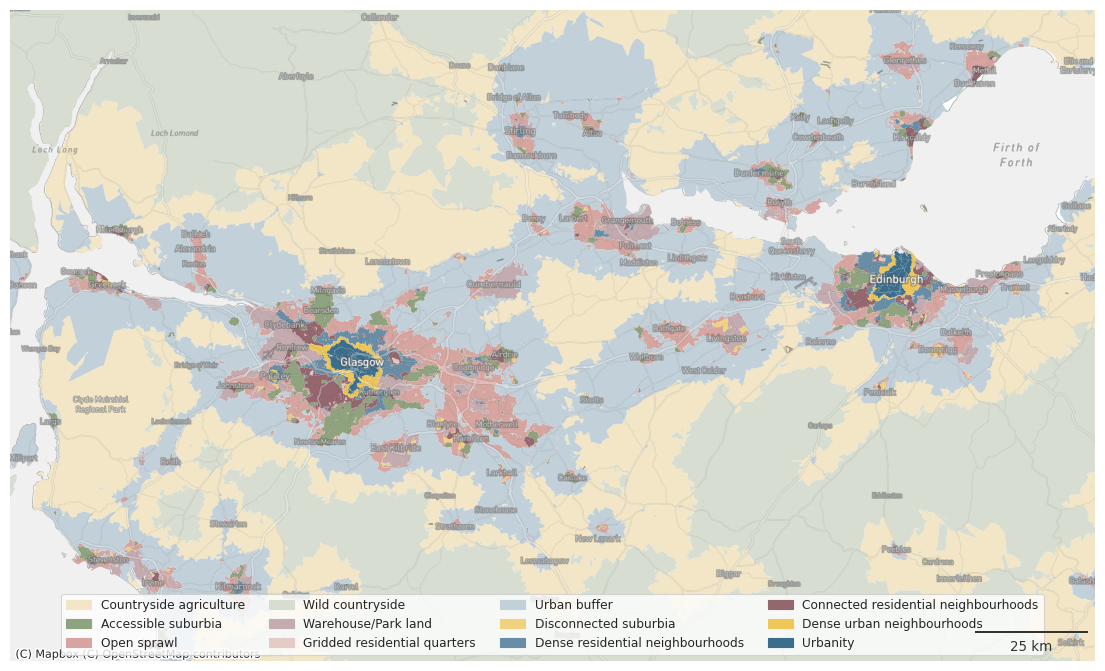

In [52]:
belt = gpd.GeoSeries([Point(-3.8718635546837663, 55.89080727223461)], crs=4326).to_crs(3857).buffer(120000).total_bounds

ax = df.plot(color=df['signature_type'].map(symbology), figsize=(14, 14), zorder=1, linewidth=0, edgecolor='w', alpha=1)

ax.set_xlim(belt[0], belt[2])
ax.set_ylim(belt[1] + (belt[3] - belt[1]) / 5, belt[3] - (belt[3] - belt[1]) / 5)

contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

for i, c in enumerate(types.keys()):
    ax.add_artist(plt.Circle((0, i), 0.4, color=symbology[c], label=types[c]))
ax.legend(loc='lower center', ncols=4)

plt.savefig("figs/signatures_scottish_belt_12_classes.png", dpi=300, bbox_inches="tight")

In [54]:
belt

array([-551013.87932843, 7416709.10995457, -311013.87932843,
       7656709.10995457])